In [1]:
### This was based on https://github.com/aclarkData/Journal-Entry-Machine-Learning
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
je_data = pd.read_csv("jan-jun-je.csv")

In [3]:
### Convert date object to date
je_data['Date'] = pd.to_datetime(je_data['Date'])

In [4]:
### Convert date to int
je_data['Date Int'] = pd.to_numeric(je_data['Date'])

In [5]:
je_data = je_data.fillna(0)

In [6]:
je_data['Mask'] = je_data['Journal ID'].astype(str).str[:3]

In [7]:
je_data.dtypes

Journal ID            object
Date          datetime64[ns]
Unit                  object
Lines                  int64
Debits               float64
Credits              float64
Source                object
User                  object
Sys Source            object
Date Int               int64
Mask                  object
dtype: object

In [8]:
from sklearn.feature_extraction import DictVectorizer

# Turn categorical features into 1-hot encoded features
categorical_features = je_data[['Unit', 'Source', 'User', 'Sys Source',
                                'Mask']]
cat_matrix = DictVectorizer().fit_transform(categorical_features.T.to_dict().values())

In [9]:
# Collect the other numerical features
from scipy.sparse import hstack
other_features = je_data[['Debits','Date Int', 'Lines']]
data_matrix = hstack([cat_matrix, other_features])

In [10]:
from sklearn.cluster import KMeans
# define how many clusters and how many iterations. 
clustering_model = KMeans(n_clusters = 25, n_init= 10)
#clustering_model.fit(data_matrix)

clusters = clustering_model.fit_predict(data_matrix)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09EA6250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0A031450>]], dtype=object)

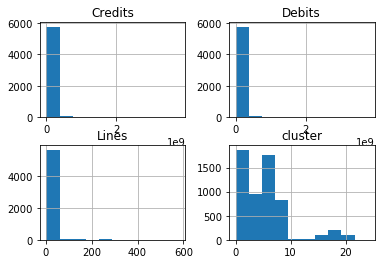

In [11]:
results = pd.DataFrame({'cluster' : clusters, 'Journal ID' : je_data['Journal ID'], 
                        'Date' : je_data['Date'], 'Unit' : je_data['Unit'], 
                        'Lines' : je_data['Lines'], 'Debits' : je_data['Debits'], 
                        'Credits' : je_data['Credits'], 'Source' : je_data['Source'], 
                        'User' : je_data['User'], 'Sys Source' : je_data['Sys Source']})
cluster_counts = results.groupby('cluster')['Debits'].value_counts()
results.hist()

In [12]:
results.describe()

,Credits,Debits,Lines,cluster
count,5.835000e+03,5.835000e+03,5835.000000,5835.000000
mean,2.382763e+07,2.382763e+07,12.904542,4.943102
std,1.784327e+08,1.784327e+08,37.714765,4.669119
min,1.000000e-02,1.000000e-02,2.000000,0.000000
25%,2.912197e+04,2.912197e+04,2.000000,1.000000
50%,3.793101e+05,3.793101e+05,4.000000,5.000000
75%,4.275635e+06,4.275635e+06,10.000000,7.000000
max,3.781887e+09,3.781887e+09,579.000000,24.000000


In [13]:
#Group results by cluster
bycluster = results.groupby('cluster')

In [14]:
#extract data per cluster where the the cluster has fewer than 20 values
kclusters=bycluster.filter(lambda x: len(x) < 20)

In [15]:
print len(kclusters)

46


In [16]:
print len(je_data)

5835


In [17]:
#export results
kclusters.to_excel('kmeans_je_jan_jun.xlsx', sheet_name='Sheet1')  

In [18]:
# This always errors due to not enough memory
# from sklearn.preprocessing import scale
# data_matrix = scale(data_matrix.todense())